In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt 
from bcb import sgs

In [2]:
start_date = dt.datetime(1970, 1, 1)
end_date = dt.datetime.now()
dftesouro10 = web.DataReader('DGS10', 'fred',start_date, end_date)

In [3]:
dftesouro2 = web.DataReader('DGS2', 'fred',start_date, end_date)
dftaxa = web.DataReader('DTB3', 'fred',start_date, end_date)



In [4]:
df = dftesouro10.join(dftesouro2)

In [5]:
df = df.dropna()

In [6]:
df = df.join(dftaxa)

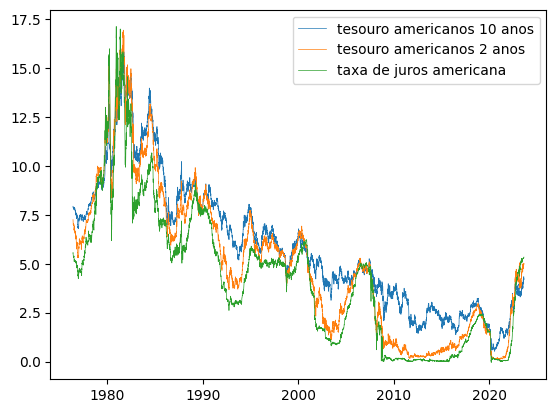

In [7]:
plt.plot(df.index, df["DGS10"], label="tesouro americanos 10 anos", linewidth=0.5)
plt.plot(df.index, df["DGS2"], label="tesouro americanos 2 anos",linewidth=0.5)
plt.plot(df.index, df["DTB3"], label="taxa de juros americana",linewidth=0.5)

plt.legend()


In [8]:
df["ratio"] = df["DGS2"]/df["DGS10"]

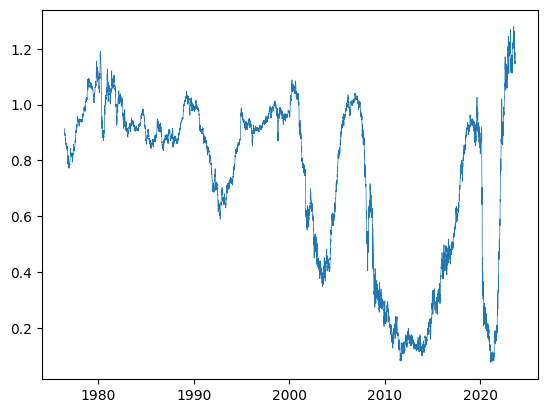

In [9]:
plt.plot(df.index, df["ratio"], label="ratio", linewidth=0.5)
stdratio = df["ratio"].std()



In [10]:
stdratio = df["ratio"].std()


In [11]:
df["ratio average"] = df["ratio"].rolling(500).mean()


In [12]:
df["average +std"] = df["ratio average"] + stdratio
df["average -std"] = df["ratio average"] - stdratio


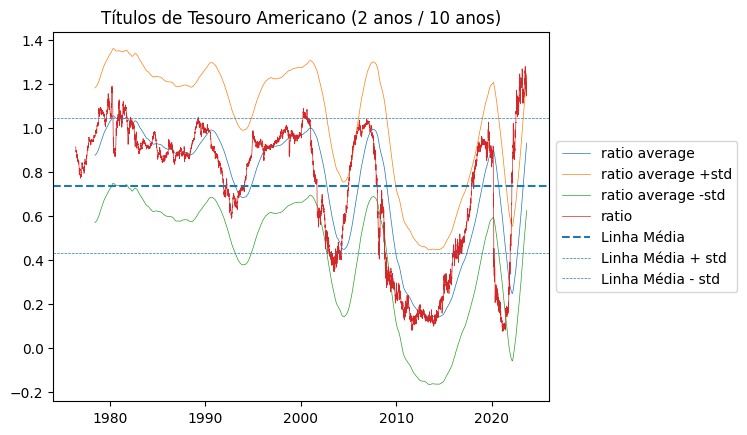

In [13]:
plt.plot(df.index, df["ratio average"], label="ratio average", linewidth=0.5)
plt.plot(df.index, df["average +std"], label="ratio average +std", linewidth=0.5)
plt.plot(df.index, df["average -std"], label="ratio average -std", linewidth=0.5)
plt.plot(df.index, df["ratio"], label="ratio", linewidth=0.5)
plt.axhline(y=df["ratio"].mean(), linestyle='--', label='Linha Média')
plt.axhline(y=df["ratio"].mean()+df["ratio"].std(), linestyle='--', linewidth=0.5, label='Linha Média + std')
plt.axhline(y=df["ratio"].mean()- df["ratio"].std(), linestyle='--', linewidth=0.5, label='Linha Média - std')
plt.title("Títulos de Tesouro Americano (2 anos / 10 anos)")




plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




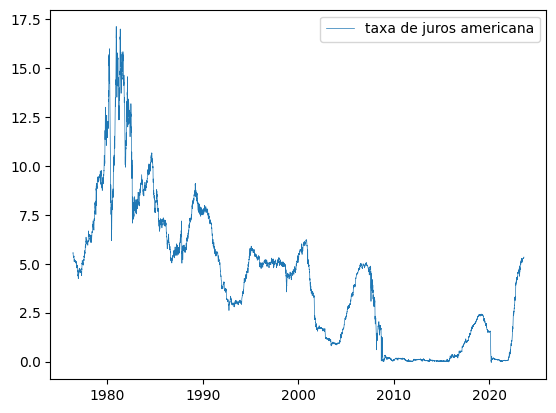

In [14]:
plt.plot(df.index, df["DTB3"], label="taxa de juros americana",linewidth=0.5)
plt.legend()


In [15]:
mean = df["ratio"].mean()

In [16]:
std = df["ratio"].std()
std

0.3058435959020184

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm)
df_norm.columns = df.columns
df_norm = df_norm.set_index(df.index)


In [19]:
df_norm = df_norm.dropna()

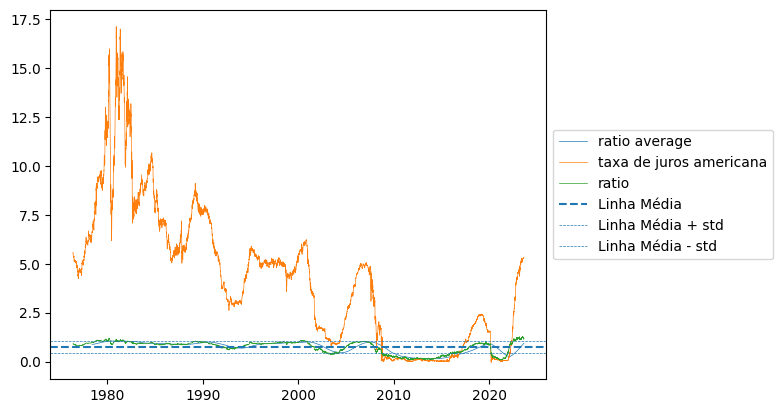

In [20]:
plt.plot(df.index, df["ratio average"], label="ratio average", linewidth=0.5)
# plt.plot(df.index, df["average +std"], label="ratio average +std", linewidth=0.5)
# plt.plot(df.index, df["average -std"], label="ratio average -std", linewidth=0.5)
plt.plot(df.index, df["DTB3"], label="taxa de juros americana",linewidth=0.5)

plt.plot(df.index, df["ratio"], label="ratio", linewidth=0.5)
plt.axhline(y=df["ratio"].mean(), linestyle='--', label='Linha Média')
plt.axhline(y=(df["ratio"].mean() +df["ratio"].std()), linestyle='--', linewidth=0.5, label='Linha Média + std')
plt.axhline(y=(df["ratio"].mean() -df["ratio"].std()), linestyle='--', linewidth=0.5, label='Linha Média - std')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

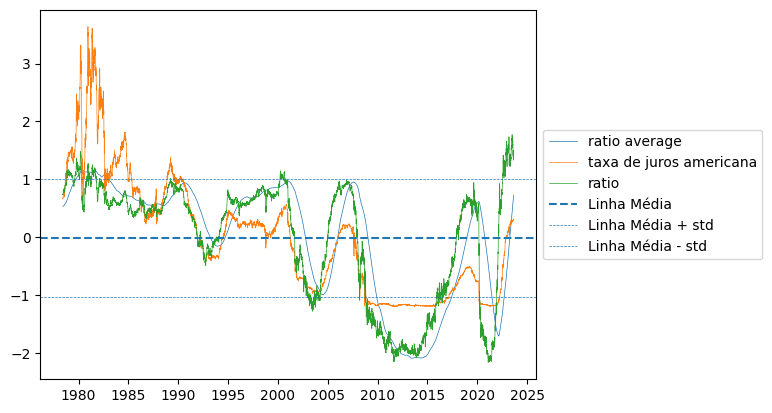

In [21]:
plt.plot(df_norm.index, df_norm["ratio average"], label="ratio average", linewidth=0.5)
# plt.plot(df_norm.index, df_norm["average +std"], label="ratio average +std", linewidth=0.5)
# plt.plot(df_norm.index, df_norm["average -std"], label="ratio average -std", linewidth=0.5)
plt.plot(df_norm.index, df_norm["DTB3"], label="taxa de juros americana",linewidth=0.5)

plt.plot(df_norm.index, df_norm["ratio"], label="ratio", linewidth=0.5)
plt.axhline(y=df_norm["ratio"].mean(), linestyle='--', label='Linha Média')
plt.axhline(y=(df_norm["ratio"].mean() +df_norm["ratio"].std()), linestyle='--', linewidth=0.5, label='Linha Média + std')
plt.axhline(y=(df_norm["ratio"].mean() -df_norm["ratio"].std()), linestyle='--', linewidth=0.5, label='Linha Média - std')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
dfsp500 = yf.download('BTC-USD', start=start_date, end = end_date)#^GSPC


[*********************100%***********************]  1 of 1 completed


In [23]:
df = df.join(dfsp500["Adj Close"])

In [24]:
df = df.dropna()

SINAIS DE COMPRA E VENDA SP500

In [25]:

df["sinal"] = np.where((df["ratio"] < df["ratio average"]), 1, -1)

In [26]:
cdi = sgs.get({'CDI':12}, start='1980-01-01')

In [27]:
df = df.join(cdi)

In [28]:
df["CDI"] = df["CDI"]/100

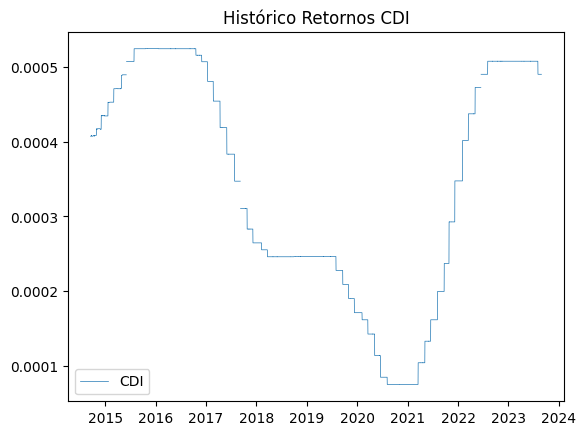

In [29]:
plt.plot(df.index, df["CDI"],linewidth=0.5, label="CDI")
plt.title("Histórico Retornos CDI")
plt.legend()


In [30]:
df  = df.dropna()

In [31]:
df["pct_change"] = df["Adj Close"].pct_change()
df = df.dropna()

In [32]:
vetor_rent_long = list([])
for i in range(len(df)):
    if (df["sinal"].iloc[i-1] == 1):
        vetor_rent_long.append(df["pct_change"].iloc[i])

    elif (df["sinal"].iloc[i-1] == -1):
        vetor_rent_long.append((df["CDI"].iloc[i]))

 

In [33]:
df["rent long"] = vetor_rent_long

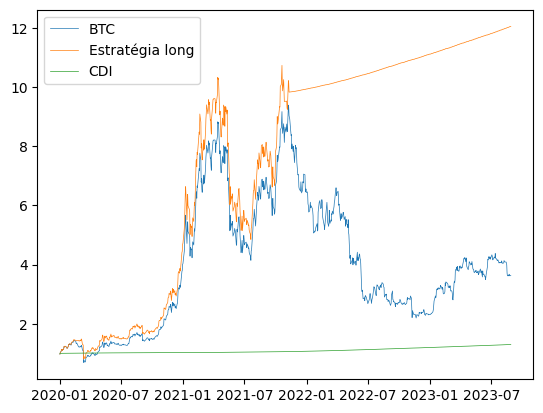

In [34]:
plt.plot(df[df.index > "2020-01-01"].index, (df[df.index > "2020-01-01"]["pct_change"]+1).cumprod(), linewidth=0.5, label="BTC")
plt.plot(df[df.index > "2020-01-01"].index, (df[df.index > "2020-01-01"]["rent long"]+1).cumprod(), linewidth=0.5, label="Estratégia long")
plt.plot(df[df.index > "2020-01-01"].index, (df[df.index > "2020-01-01"]["CDI"]+1).cumprod(),linewidth=0.5, label="CDI")
plt.legend()
